In [2]:
import numpy as np
from scipy.stats import invgamma
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


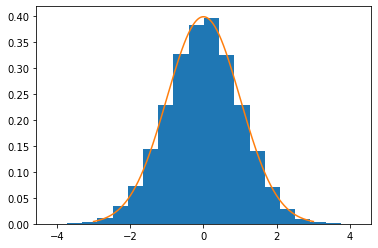

In [3]:
def normal(x,mu,sigma):
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator



def random_coin(p):
    unif = np.random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gaussian_mcmc(hops,mu,sigma):
    states = []
    burn_in = int(hops*0.2)
    current = np.random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = np.random.uniform(-5*sigma+mu,5*sigma+mu)
        
        curr_prob = normal(x=current,mu=mu,sigma=sigma)
        move_prob = normal(x=movement,mu=mu,sigma=sigma)
        
        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement
    return states[burn_in:]
    
lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000,mu=0,sigma=1)
plt.hist(dist,normed=1,bins=20) 
plt.plot(lines,normal_curve)

In [4]:
np.random.normal(0,1)

-0.7747239617830529

In [8]:


def inverse_gamma_unnormalised(x, a, b):
    return(x**(-a-1))*np.exp(-(b/x))

def norm_log_pdf(y,sig2):
    return(-0.5*(y**2)/sig2-np.log(np.sqrt(2*np.pi*sig2)))

def ig_rw(n=10000,rw_step = 1):
    a0=1
    b0=1 
    m0=0
    C0=1
    
    dim_y=5
    y=np.random.normal(0, 1, dim_y)*np.sqrt(C0)
    
    SIGMA2=np.zeros(n)
    RATIO = []
    
    sigma2Sample =1./ np.random.gamma(a0,1/b0)

    Prior=inverse_gamma_unnormalised(sigma2Sample,a0,b0)
    logYsum=sum(norm_log_pdf(y,sigma2Sample)) + np.log(Prior)
    
    for i in range(n):
        # Random Walk move with Gaussian
        sigma2SampleNew = sigma2Sample + rw_step * np.random.normal(0,1)
#         print(sigma2SampleNew)
        while(sigma2SampleNew <=0):
            sigma2SampleNew = sigma2Sample + rw_step * np.random.normal(0,1)
        PriorNew=inverse_gamma_unnormalised(sigma2SampleNew,a0,b0)
        logYsumNew=sum(norm_log_pdf(y,sigma2SampleNew))+ np.log(PriorNew)

        ratio=np.exp(logYsumNew-logYsum)
        accept_ratio=min(1,ratio)
        RATIO.append(accept_ratio)

        u = np.random.uniform(0,1)
        if (u<= accept_ratio):
            SIGMA2[i]=sigma2SampleNew
            logYsum=logYsumNew
            sigma2Sample=sigma2SampleNew
        else:
            SIGMA2[i]=sigma2Sample
            
    return(SIGMA2)

C:\Users\yexue\Anaconda3\Lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


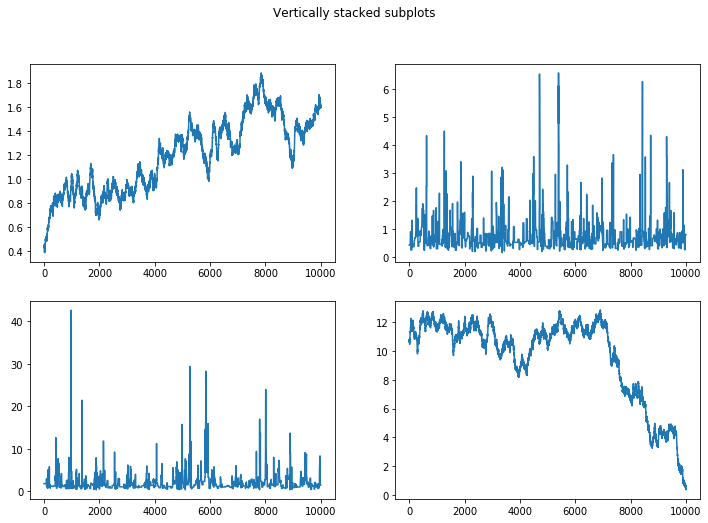

In [9]:

fig, axs = plt.subplots(2,2,figsize=(12, 8))
fig.suptitle('Vertically stacked subplots')
axs[0][0].plot(ig_rw(10000,0.01))
axs[0][1].plot(ig_rw(10000,10))
axs[1][0].plot(ig_rw(10000,30))
axs[1][1].plot(ig_rw(10000,0.07))


In [56]:
nSamples = 5000
mu = [0,0]
rho = [0.8, 0.8]

# % INITIALIZE THE GIBBS SAMPLER
propSigma = 1
minn = [-3,-3]
maxx = [3,3]

# INITIALIZE SAMPLES
x = np.zeros([nSamples, 2])
x[0][0] = np.random.uniform(minn[0],maxx[0])
x[0][1] = np.random.uniform(minn[1],maxx[1])
# dims = [0,1]

for t in range(nSamples):
    T = [t-1, t]
    for i in [0,1]:
        # update samples
        nIx = 1-i
        # conditional mean
        mu_cond = mu[i] + rho[i] * (x[T[i]][nIx] - mu[nIx])
#         print(x[T[i]][nIx])
        # conditional variance
        var_cond = np.sqrt(1-rho[i]**2)
        # draw from condtional
#         print(np.random.normal(mu_cond, var_cond))
        x[t][i] = np.random.normal(mu_cond, var_cond)
           
#     mu0_cond = mu[0] + rho[0] * (x[t-1][1] - mu[1])
#     var0_cond = np.sqrt(1-rho[0]**2)
#     x[t][0] = np.random.normal(mu0_cond, var0_cond)
    
#     mu0_cond = mu[1] + rho[1] * (x[t][0] - mu[0])
#     var0_cond = np.sqrt(1-rho[1]**2)
#     x[t][1] = np.random.normal(mu0_cond, var0_cond)

# for t in range(1,nSamples):
#     [x1,x2] = x[t-1]
#     x1 = rcond(x2,rho[1])
#     x2 = rcond(x1,rho[0])
# #     print(x[t])
#     x[t]=np.array([x1,x2])


In [57]:
def rcond(x2, rho):
    return(np.random.normal(rho*x2, np.sqrt(1-rho**2)))

In [73]:
print(x)

[[ 0.00710905 -0.44639214]
 [ 0.30031055  0.59519383]
 [ 0.086945   -0.86037943]
 ...
 [ 0.13373002  0.20420945]
 [ 0.21346368  0.19704414]
 [ 0.86651233  0.26441413]]


In [76]:
x[0]
x[1]

array([0.30031055, 0.59519383])

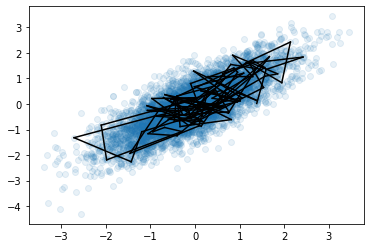

In [79]:
# plt.plot(x[:][0],x[:][1])
np.transpose(x)
plt.plot(np.transpose(x)[0],np.transpose(x)[1], "o", alpha = 0.1)
for t in range(100):
    x_values = [x[t][0], x[t+1][0]]
    y_values = [x[t][1], x[t+1][1]]
    plt.plot(x_values,y_values, color ="black")